In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [85]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/salary2.csv",encoding="utf-8")

In [3]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

## 데이터셋 설명 
## 학력, 교육, 연수,혼인 상태, 직업 정보가 있는 연봉 데이터셋을 이용해 연봉 예측하기 


* age : 나이 
* workclass: 고용형태
* education : 학력 
* education-num : 교육기간 
* marital-status : 혼인상태 
* occupation : 직업 
* relationship : 가족 관계 
* race : 인종 
* sex : 성별 
* capital-gain : 자산 증가 (주식거래 내역 같은) 
* capital-loss : 자산 감소 
* hours-per-week : 주당 노동 시간 
* native-country : 고향 
* class : 연봉 (종속변수) 

*'age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [4]:
data["class"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [95]:
# 결측값 확인
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data[data["capital-gain"] == 99999.000000]

In [14]:
data[data["workclass"].isna()]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
22,72,NaN,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,NaN,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,NaN,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,NaN,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [ ]:
data.describe()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [86]:
data = data.apply(lambda x: x.str.strip().replace(" ","") if x.dtype == "object" else x)

In [87]:
data[(data["workclass"] == "None") & (data["class"] == ">50K")] #null값 측정

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class


In [10]:
data[(data["workclass"] == "None") & (data["class"] == ">50K")]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class


In [89]:
data["class"].value_counts()

class
<=50K    34014
>50K     11208
Name: count, dtype: int64

In [88]:
data = data.dropna()

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   sex             45222 non-null  object
 9   capital-gain    45222 non-null  int64 
 10  capital-loss    45222 non-null  int64 
 11  hours-per-week  45222 non-null  int64 
 12  native-country  45222 non-null  object
 13  class           45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [91]:
data = data.fillna("None")

In [92]:
copy_data = data.copy()

In [147]:
copy_data["native-country"] = copy_data["native-country"].apply(lambda x : "domestic" if "United-States" in x else "Overseas" )

In [101]:
copy_data["age"].unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86], dtype=int64)

In [102]:
copy_data["marital-status"].unique()


array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [115]:
def married_def(x):
    if "Married-civ-spouse" in x or "Married-AF-spouse" in x:
        return "married"
    else:
        return "no-married"

In [117]:
copy_data["marital-status"] = copy_data["marital-status"].apply(married_def)

In [122]:
copy_data["workclass"] = 

array(['Private', 'Local-gov', 'None', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [123]:
copy_data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,no-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,domestic,<=50K
1,38,Private,HS-grad,9,married,Farming-fishing,Husband,White,Male,0,0,50,domestic,<=50K
2,28,Local-gov,Assoc-acdm,12,married,Protective-serv,Husband,White,Male,0,0,40,domestic,>50K
3,44,Private,Some-college,10,married,Machine-op-inspct,Husband,Black,Male,7688,0,40,domestic,>50K
4,18,None,Some-college,10,no-married,None,Own-child,White,Female,0,0,30,domestic,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,married,Tech-support,Wife,White,Female,0,0,38,domestic,<=50K
48838,40,Private,HS-grad,9,married,Machine-op-inspct,Husband,White,Male,0,0,40,domestic,>50K
48839,58,Private,HS-grad,9,no-married,Adm-clerical,Unmarried,White,Female,0,0,40,domestic,<=50K
48840,22,Private,HS-grad,9,no-married,Adm-clerical,Own-child,White,Male,0,0,20,domestic,<=50K


In [57]:
data[data["hours-per-week"] == 99]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
384,29,Private,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,99,United-States,>50K
901,37,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7688,0,99,United-States,>50K
1121,31,Local-gov,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,Columbia,<=50K
1156,48,NaN,5th-6th,3,Divorced,NaN,Not-in-family,White,Male,0,0,99,United-States,<=50K
1649,52,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,99,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47273,40,Self-emp-inc,Masters,14,Never-married,Other-service,Own-child,White,Male,0,0,99,United-States,<=50K
47962,43,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1902,99,United-States,>50K
47980,43,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K
48750,58,Self-emp-inc,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,NaN,<=50K


In [58]:
data["marital-status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Widowed', ' Divorced',
       ' Separated', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

In [51]:
data["workclass"].unique()

array([' Private', ' Local-gov', nan, ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

## Age 분포

In [15]:
data["age"] = data["age"].apply(lambda x: age_dist(x))

In [12]:
def age_dist(i):
        if 0 < i < 10:
            return 'under10s'
        elif 10 <= i < 20:
            return '10s'
        elif 20<= i < 30:
            return '20s'
        elif 30 <= i < 40:
            return '30s'
        elif 40<= i < 50 :
            return '40s'
        elif 50 <= i < 60:
            return '50s'
        elif 60<= i < 70:
            return '60s'
        elif 70<= i <80:
            return '70s'
        elif 80<= i < 90:
            return '80s'
        elif 90 <= i < 100:
            return '90s'

In [16]:
data["age"].value_counts()

age
30s    12362
20s    10993
40s    10305
50s     6264
60s     2514
10s     2052
70s      589
80s       97
90s       46
Name: count, dtype: int64

In [17]:
data.loc[(data["age"]=='90s','class')].value_counts()

class
<=50K    34
>50K     12
Name: count, dtype: int64

In [18]:
data.loc[(data["age"]=='90s')]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
899,90s,Private,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,1825,50,United-States,>50K
3496,90s,Self-emp-not-inc,Prof-school,15,Widowed,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
6976,90s,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,2414,0,40,United-States,<=50K
7414,90s,Private,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Male,6097,0,45,United-States,>50K
7419,90s,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,45,United-States,>50K
8427,90s,Federal-gov,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,99,United-States,<=50K
8982,90s,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,South,<=50K
10735,90s,Local-gov,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,11678,0,40,United-States,>50K
12446,90s,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,1944,12,United-States,<=50K
13958,90s,Private,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,10,United-States,<=50K


<Axes: xlabel='age,class'>

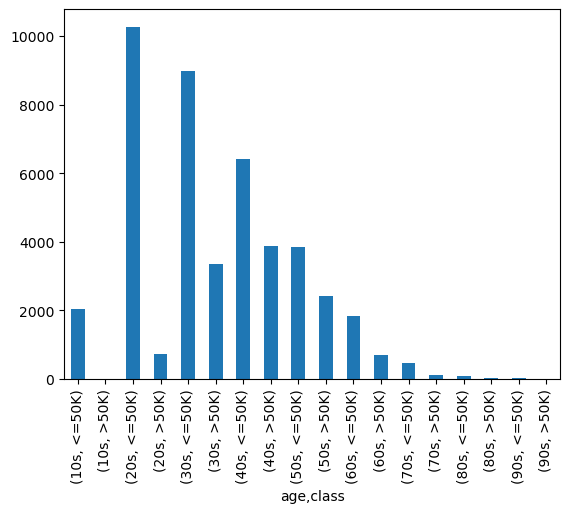

In [160]:
data.groupby('age')['class'].value_counts(sort=False).plot(kind="bar")

<Axes: xlabel='age'>

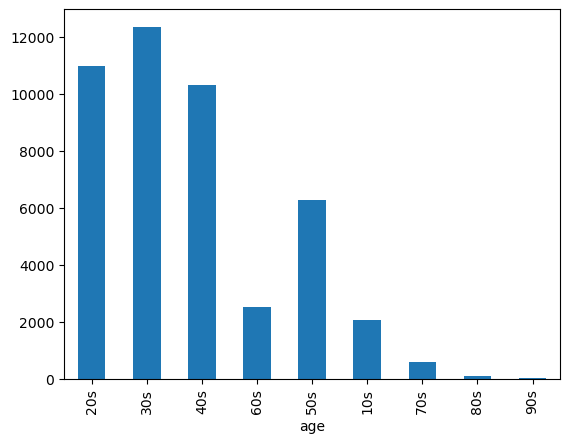

In [164]:
data["age"].value_counts(sort=False).plot(kind="bar") # 나이별 분포

## workclass

In [165]:
data["workclass"].value_counts()

workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: count, dtype: int64

<Axes: xlabel='workclass,class'>

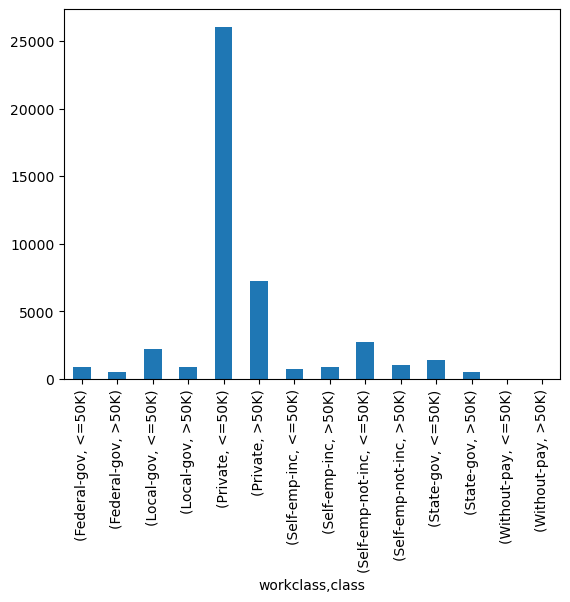

In [168]:
data.groupby("workclass")["class"].value_counts(sort=False).plot(kind="bar")

In [169]:
data.groupby("workclass")["class"].value_counts(sort=False)

workclass         class
Federal-gov       <=50K      857
                  >50K       549
Local-gov         <=50K     2185
                  >50K       915
Private           <=50K    26056
                  >50K      7251
Self-emp-inc      <=50K      734
                  >50K       912
Self-emp-not-inc  <=50K     2737
                  >50K      1059
State-gov         <=50K     1426
                  >50K       520
Without-pay       <=50K       19
                  >50K         2
Name: count, dtype: int64

In [173]:
data["workclass"]

0             Private
1             Private
2           Local-gov
3             Private
5             Private
             ...     
48837         Private
48838         Private
48839         Private
48840         Private
48841    Self-emp-inc
Name: workclass, Length: 45222, dtype: object

In [175]:
data["class"].unique()

array(['<=50K', '>50K'], dtype=object)

## 추측 내용 
* 중앙 정부에서 일할 경우 5만불 이상 가능성이 높고 
* 자영업자의 경우 55%에 달함 

## education 

In [176]:
data["education"].value_counts()

education
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: count, dtype: int64

In [24]:
def c_ratio(x):
    for idx,item in zip(x.index,x):
        if idx[1] == '<=50K':
            under = item 
        else :
            upper = item
            class_ratio = upper / (upper+under) * 100 
            print(idx,f'{class_ratio:.2f}%')

In [201]:
c_ratio(data.groupby("workclass")["class"].value_counts(sort=False))

('Federal-gov', '>50K') 39.05%
('Local-gov', '>50K') 29.52%
('Private', '>50K') 21.77%
('Self-emp-inc', '>50K') 55.41%
('Self-emp-not-inc', '>50K') 27.90%
('State-gov', '>50K') 26.72%
('Without-pay', '>50K') 9.52%


In [198]:
c_ratio(data.groupby("education")["class"].value_counts(sort=False))

('10th', '>50K') 6.70%
('11th', '>50K') 5.50%
('12th', '>50K') 7.45%
('1st-4th', '>50K') 3.60%
('5th-6th', '>50K') 4.90%
('7th-8th', '>50K') 6.68%
('9th', '>50K') 5.62%
('Assoc-acdm', '>50K') 26.41%
('Assoc-voc', '>50K') 25.73%
('Bachelors', '>50K') 41.98%
('Doctorate', '>50K') 73.35%
('HS-grad', '>50K') 16.34%
('Masters', '>50K') 55.41%
('Preschool', '>50K') 1.39%
('Prof-school', '>50K') 75.41%
('Some-college', '>50K') 20.10%


## 고학력일수록 연봉 5만 이상자가 많다.

In [202]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

## education-num

In [ ]:
data["education-num"].plot(kind="bar")

KeyboardInterrupt: 

In [20]:
data["education-num"].value_counts(sort=False)

education-num
7      1619
9     14783
12     1507
10     9899
6      1223
15      785
4       823
13     7570
14     2514
3       449
11     1959
5       676
16      544
8       577
2       222
1        72
Name: count, dtype: int64

In [25]:
c_ratio(data.groupby("education-num")["class"].value_counts(sort=False))

(1, '>50K') 1.39%
(2, '>50K') 3.60%
(3, '>50K') 4.90%
(4, '>50K') 6.68%
(5, '>50K') 5.62%
(6, '>50K') 6.70%
(7, '>50K') 5.50%
(8, '>50K') 7.45%
(9, '>50K') 16.34%
(10, '>50K') 20.10%
(11, '>50K') 25.73%
(12, '>50K') 26.41%
(13, '>50K') 41.98%
(14, '>50K') 55.41%
(15, '>50K') 75.41%
(16, '>50K') 73.35%


## marital-status

In [21]:
data["marital-status"].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated',
       'Divorced', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [27]:
data["marital-status"].value_counts()

marital-status
Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: count, dtype: int64

In [30]:
data.groupby("marital-status")["class"].value_counts(sort=False)

marital-status         class
Divorced               <=50K     5642
                       >50K       655
Married-AF-spouse      <=50K       18
                       >50K        14
Married-civ-spouse     <=50K    11491
                       >50K      9564
Married-spouse-absent  <=50K      498
                       >50K        54
Never-married          <=50K    13897
                       >50K       701
Separated              <=50K     1312
                       >50K        99
Widowed                <=50K     1156
                       >50K       121
Name: count, dtype: int64

In [32]:
c_ratio(data.groupby("marital-status")["class"].value_counts(sort=False))

('Divorced', '>50K') 10.40%
('Married-AF-spouse', '>50K') 43.75%
('Married-civ-spouse', '>50K') 45.42%
('Married-spouse-absent', '>50K') 9.78%
('Never-married', '>50K') 4.80%
('Separated', '>50K') 7.02%
('Widowed', '>50K') 9.48%


## 결혼을 했을 경우 소득이 높다 

## occupation

In [35]:
c_ratio(data.groupby("occupation")["class"].value_counts(sort=False))

('Adm-clerical', '>50K') 13.65%
('Armed-Forces', '>50K') 28.57%
('Craft-repair', '>50K') 22.51%
('Exec-managerial', '>50K') 47.91%
('Farming-fishing', '>50K') 11.62%
('Handlers-cleaners', '>50K') 6.60%
('Machine-op-inspct', '>50K') 12.29%
('Other-service', '>50K') 4.08%
('Priv-house-serv', '>50K') 1.29%
('Prof-specialty', '>50K') 45.01%
('Protective-serv', '>50K') 31.45%
('Sales', '>50K') 26.90%
('Tech-support', '>50K') 28.94%
('Transport-moving', '>50K') 20.64%


## relationship

In [36]:
c_ratio(data.groupby("relationship")["class"].value_counts(sort=False))

('Husband', '>50K') 45.57%
('Not-in-family', '>50K') 10.49%
('Other-relative', '>50K') 3.71%
('Own-child', '>50K') 1.58%
('Unmarried', '>50K') 6.31%
('Wife', '>50K') 48.59%


# race

In [37]:
c_ratio(data.groupby("race")["class"].value_counts(sort=False))

('Amer-Indian-Eskimo', '>50K') 12.18%
('Asian-Pac-Islander', '>50K') 28.32%
('Black', '>50K') 12.63%
('Other', '>50K') 12.75%
('White', '>50K') 26.24%


## 아시안이거나 백인인 경우 소득이 높은 편

# sex

In [39]:
data["sex"].value_counts()

sex
Male      30527
Female    14695
Name: count, dtype: int64

In [42]:
c_ratio(data.groupby("sex")["class"].value_counts(sort=False))

('Female', '>50K') 11.36%
('Male', '>50K') 31.25%


## capital-gain 

In [47]:
data["capital-gain"] = data["capital-gain"].apply(lambda x: 1 if x > 0 else 0)

In [50]:
data["capital-loss"] = data["capital-loss"].apply(lambda x: 1 if x > 0 else 0)

In [52]:
data["capital-loss"].value_counts()

capital-loss
0    43082
1     2140
Name: count, dtype: int64

In [53]:
data["capital-gain"].value_counts()

capital-gain
0    41432
1     3790
Name: count, dtype: int64

In [54]:
c_ratio(data.groupby("capital-gain")["class"].value_counts(sort=False))

(0, '>50K') 21.32%
(1, '>50K') 62.66%


In [55]:
c_ratio(data.groupby("capital-loss")["class"].value_counts(sort=False))

(0, '>50K') 23.47%
(1, '>50K') 51.31%


<Axes: ylabel='Frequency'>

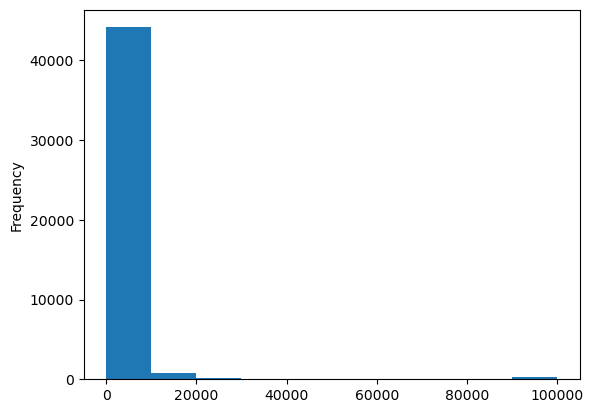

In [43]:
data["capital-gain"].plot(kind="hist")

## hours-per-week 

<Axes: ylabel='Frequency'>

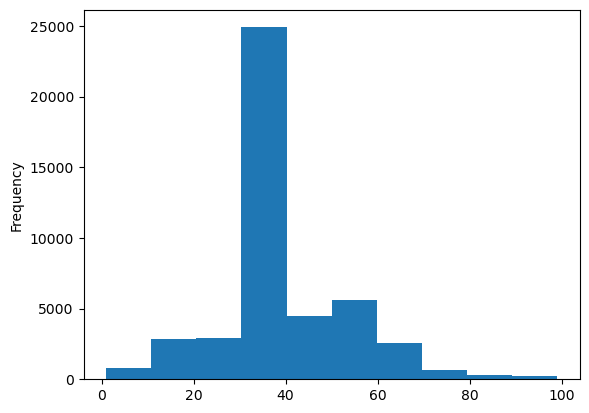

In [64]:
data["hours-per-week"].plot(kind="hist")

In [66]:
data["hours-per-week"].describe()

count    45222.000000
mean        40.938017
std         12.007508
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [73]:
nor_max = 45+((45-40)*1.5) # 상한 
nor_max

52.5

In [75]:
nor_min = 40 - ((45-40)*1.5) # 하한
nor_min

32.5

In [93]:
def work_balance(x):
    if x > 52.5 :
        return 'work_more'
    elif x < 32.5:
        return 'work_less'
    else:
        return 'work_normal'

In [94]:
data["hours-per-week"] = data["hours-per-week"].apply(lambda x : work_balance(x)  )

In [95]:
c_ratio(data.groupby("hours-per-week")["class"].value_counts(sort=False))

('work_less', '>50K') 6.82%
('work_more', '>50K') 41.80%
('work_normal', '>50K') 25.97%


## native-country

In [98]:
data["native-country"].value_counts()

native-country
United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador      

In [101]:
c_ratio(data.groupby("native-country")["class"].value_counts(sort=False))

('Cambodia', '>50K') 34.62%
('Canada', '>50K') 36.81%
('China', '>50K') 31.86%
('Columbia', '>50K') 4.88%
('Cuba', '>50K') 25.56%
('Dominican-Republic', '>50K') 5.15%
('Ecuador', '>50K') 13.95%
('El-Salvador', '>50K') 7.48%
('England', '>50K') 39.50%
('France', '>50K') 44.44%
('Germany', '>50K') 30.05%
('Greece', '>50K') 36.73%
('Guatemala', '>50K') 3.49%
('Haiti', '>50K') 13.04%
('Honduras', '>50K') 10.53%
('Hong', '>50K') 28.57%
('Hungary', '>50K') 33.33%
('India', '>50K') 42.18%
('Iran', '>50K') 39.29%
('Ireland', '>50K') 27.78%
('Italy', '>50K') 33.00%
('Jamaica', '>50K') 13.59%
('Japan', '>50K') 34.83%
('Laos', '>50K') 9.52%
('Mexico', '>50K') 5.20%
('Nicaragua', '>50K') 6.25%
('Outlying-US(Guam-USVI-etc)', '>50K') 4.55%
('Peru', '>50K') 8.89%
('Philippines', '>50K') 29.68%
('Poland', '>50K') 19.75%
('Portugal', '>50K') 19.35%
('Puerto-Rico', '>50K') 11.43%
('Scotland', '>50K') 10.00%
('South', '>50K') 17.82%
('Taiwan', '>50K') 45.45%
('Thailand', '>50K') 17.24%
('Trinadad&Tobago'

In [102]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,work_normal,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,work_normal,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,work_normal,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,work_normal,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,work_less,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,work_normal,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,work_normal,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,work_normal,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,work_less,United-States,<=50K


In [103]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,work_normal,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,work_normal,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,work_normal,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,work_normal,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,work_less,United-States,<=50K


In [104]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,work_normal,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,work_normal,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,work_normal,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,work_normal,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,work_less,United-States,<=50K


In [106]:
data = data.drop(["education","capital-gain","capital-loss"],axis=1)

## 더미변수화

In [107]:
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,class
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,work_normal,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,work_normal,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,work_normal,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,work_normal,United-States,>50K
5,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,work_less,United-States,<=50K


In [110]:
df=pd.get_dummies(data,drop_first=True)

In [111]:
df.head()

,age,education-num,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,class_>50K
0,25,7,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,38,9,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,28,12,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,44,10,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
5,34,6,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [114]:
X = df.drop("class_>50K",axis=1)
y = df["class_>50K"]

In [115]:
from sklearn.model_selection import train_test_split

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.6,random_state= 10 )

## 배깅을 위한 앙상블 분석 
### 예측력을 높이기 위해서 여러 번의 데이터 분할을 통해 구축된 다수의 모형을 결합해서 새로운 모형을 만드는 방법 

* 앙상블 분석의 종류 
* 배깅 :
* 부스팅: 
    * ADABoost(에이다 부스트)
    * XGBoost(XG부스트) 
    * Gradient Boost(그래디언트 부스트) 
    * LightGBM(라이트 GBM)
* 랜덤배깅 
    * 랜덤 포레스트 
  

## 배깅 
* 여러 개의 부트스트랩을 생성해서 각각을 분류기에 넣고 분석한 결과를 집계하는 알고리즘 
* 여러 개의 분류기에 의한 결과를 놓고 다수결의 의하여 최종 결과 값을 선정 하는 보팅으로 결정 


In [123]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,classification_report

In [125]:
bcf = BaggingClassifier(n_estimators=1000,n_jobs=-1,random_state=10)
bcf.fit(X_train,y_train)
pred_bcf = bcf.predict(X_test)
print(accuracy_score(y_test,pred_bcf))
print(classification_report(y_test,pred_bcf))


0.8077688508881846
              precision    recall  f1-score   support

       False       0.86      0.89      0.87     20411
        True       0.62      0.56      0.59      6723

    accuracy                           0.81     27134
   macro avg       0.74      0.72      0.73     27134
weighted avg       0.80      0.81      0.80     27134



## 부스팅 

## 1. ADABoosting
* 오류에 가중치를 부여하면서 부스팅을 수행 하는 대표적인 알고리즘 
* 오류를 최소화 하는 방향성을 가지고 반복적으로 가중치를 업데이트 시켜서 성능을 향상시킴 
* DecisionTreeClassifier(max_depth=1)을 사용하는 아주 약한 학습기 
* 단점 : 순차적으로 학습 해야 하므로 멀티코어를 사용할 수 없음, 분석 시간이 오래걸림 
* 하이퍼파라미터
    * n_estimators : int,default = 50 
    * learning_rate = float,default = 1.0 
    * algorithm : {'SAMME','SAMMER.R'} , default=SAMMER.R 

In [129]:
from sklearn.ensemble import AdaBoostClassifier

In [130]:
ada = AdaBoostClassifier(n_estimators =1000,random_state = 10)
ada.fit(X_train,y_train)
pred_ada = ada.predict(X_test)
print(accuracy_score(y_test,pred_ada))
print(classification_report(y_test,pred_ada))

0.8355568659246702
              precision    recall  f1-score   support

       False       0.87      0.92      0.89     20411
        True       0.70      0.59      0.64      6723

    accuracy                           0.84     27134
   macro avg       0.79      0.75      0.77     27134
weighted avg       0.83      0.84      0.83     27134



### 2. 그래디언트 부스팅 GradientTreeBoosting
* 이전 트리의 오차를 보완하는 방식으로 순차적 트리 생성 
* 무작위성은 없지만 강력한 사전 가지치기가 사용 됨 
* 오류의 가중치를 부여하면서 부스팅을 수행하는 점에서는 동일하나 가중치 업데이트를 경사하강법을 이용해 한다는 점이 다름 
* 약한 학습기의 순차적인 예측 오류 보정을 통해서 학습을 수행하므로 멀티코어 병렬 처리가 안됨 → 분석 시간이 오래걸림 
* 하이퍼 파라미터 
    * loss : 경사하강법의 사용할 비용 함수 
    * learning_rate : 학습률 0~1 사이의 값 작은 값일 수록 예측성능이 좋아질 수 있으나, 시간이 오래 걸리고 너무 작으면 지역해에 빠질 수 있음 
    * n_estimators : 기본 100, 약학습기의 숫자가 많을 수록 예측 성능 향상 되나 과적합 우려가 있음 
    * learning_rate를 작게 하고, n_estimator를 크게 하면 한계점까지 예측 성능이 좋아질 수 있음 
    * max_depth : default = 3 , 트리 복잡도가 낮아지도록 5를 넘지 않게 세팅 

In [135]:
from sklearn.ensemble import GradientBoostingClassifier 
gbc = GradientBoostingClassifier(learning_rate = 0.01,n_estimators= 10000,random_state=10)

In [136]:
gbc.fit(X_train,y_train)
pred_gbc = gbc.predict(X_test)
print(accuracy_score(y_test,pred_gbc))
print(classification_report(y_test,pred_gbc))

0.8353725952679295
              precision    recall  f1-score   support

       False       0.87      0.92      0.89     20411
        True       0.70      0.59      0.64      6723

    accuracy                           0.84     27134
   macro avg       0.78      0.75      0.77     27134
weighted avg       0.83      0.84      0.83     27134



## 히스토그램 그래디언트 부스팅(HistGradientBoostingClassifier)
* 데이터가 10만개 이상일경우 사용 
* 그래디언트 부스팅 보다 속도가 빠름 

In [140]:
from sklearn.ensemble import HistGradientBoostingClassifier 
hbc = HistGradientBoostingClassifier(random_state=10)
hbc.fit(X_train,y_train)
pred_hbc = hbc.predict(X_test)
print(accuracy_score(y_test,pred_hbc))
print(classification_report(y_test,pred_hbc))

0.8357042824500627
              precision    recall  f1-score   support

       False       0.87      0.91      0.89     20411
        True       0.70      0.60      0.64      6723

    accuracy                           0.84     27134
   macro avg       0.79      0.76      0.77     27134
weighted avg       0.83      0.84      0.83     27134



## XGBoost
* 그래디언트 부스팅의 느린 속도 및 과적합 문제를 해결한 소팅 방법 
* 멀티 코어 분석 지원 
* 자체 과적합 규제기능이 있음 
* 더 이상 긍정적인 영향이 없는 가지에 대한 가지치기 기능 지원 
* 교차검증 기능 자체적 내장, 조기중단 가능 
* 결측값, 자체 처리 
* 주요 하이퍼 파라미터 
    * learning_rate : 작게 
    * n_estimators : 크게 주는게 좋음 
* early stopping관련 옵션 
    * early_stopping_rounds = 100 
    * eval_metric = 'logloss'
    * eval-set = [(X_test,y_test)]
    * verbose =True 

In [141]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_jobs=-1,n_estimators= 1000,random_state=10,learning_rate=0.01)
xgb.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',eval_set=[(X_test,y_test)])
pred_xgb = xgb.predict(X_test)
print(accuracy_score(y_test,pred_xgb))
print(classification_report(y_test,pred_xgb))

C:\Users\hi\anaconda3\envs\myvenv\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\hi\anaconda3\envs\myvenv\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.55745
[1]	validation_0-logloss:0.55411
[2]	validation_0-logloss:0.55085
[3]	validation_0-logloss:0.54767
[4]	validation_0-logloss:0.54458
[5]	validation_0-logloss:0.54153
[6]	validation_0-logloss:0.53856
[7]	validation_0-logloss:0.53565
[8]	validation_0-logloss:0.53281
[9]	validation_0-logloss:0.53004
[10]	validation_0-logloss:0.52730
[11]	validation_0-logloss:0.52463
[12]	validation_0-logloss:0.52200
[13]	validation_0-logloss:0.51943
[14]	validation_0-logloss:0.51692
[15]	validation_0-logloss:0.51445
[16]	validation_0-logloss:0.51203
[17]	validation_0-logloss:0.50966
[18]	validation_0-logloss:0.50734
[19]	validation_0-logloss:0.50505
[20]	validation_0-logloss:0.50283
[21]	validation_0-logloss:0.50063
[22]	validation_0-logloss:0.49849
[23]	validation_0-logloss:0.49637
[24]	validation_0-logloss:0.49430
[25]	validation_0-logloss:0.49227
[26]	validation_0-logloss:0.49027
[27]	validation_0-logloss:0.48830
[28]	validation_0-logloss:0.48639
[29]	validation_0-loglos

[237]	validation_0-logloss:0.36564
[238]	validation_0-logloss:0.36553
[239]	validation_0-logloss:0.36540
[240]	validation_0-logloss:0.36530
[241]	validation_0-logloss:0.36519
[242]	validation_0-logloss:0.36508
[243]	validation_0-logloss:0.36499
[244]	validation_0-logloss:0.36488
[245]	validation_0-logloss:0.36478
[246]	validation_0-logloss:0.36469
[247]	validation_0-logloss:0.36460
[248]	validation_0-logloss:0.36450
[249]	validation_0-logloss:0.36440
[250]	validation_0-logloss:0.36430
[251]	validation_0-logloss:0.36421
[252]	validation_0-logloss:0.36411
[253]	validation_0-logloss:0.36402
[254]	validation_0-logloss:0.36393
[255]	validation_0-logloss:0.36385
[256]	validation_0-logloss:0.36376
[257]	validation_0-logloss:0.36367
[258]	validation_0-logloss:0.36358
[259]	validation_0-logloss:0.36350
[260]	validation_0-logloss:0.36342
[261]	validation_0-logloss:0.36335
[262]	validation_0-logloss:0.36327
[263]	validation_0-logloss:0.36318
[264]	validation_0-logloss:0.36310
[265]	validation_0-l

[472]	validation_0-logloss:0.35516
[473]	validation_0-logloss:0.35515
[474]	validation_0-logloss:0.35514
[475]	validation_0-logloss:0.35512
[476]	validation_0-logloss:0.35508
[477]	validation_0-logloss:0.35505
[478]	validation_0-logloss:0.35502
[479]	validation_0-logloss:0.35501
[480]	validation_0-logloss:0.35497
[481]	validation_0-logloss:0.35494
[482]	validation_0-logloss:0.35492
[483]	validation_0-logloss:0.35491
[484]	validation_0-logloss:0.35487
[485]	validation_0-logloss:0.35486
[486]	validation_0-logloss:0.35484
[487]	validation_0-logloss:0.35481
[488]	validation_0-logloss:0.35479
[489]	validation_0-logloss:0.35476
[490]	validation_0-logloss:0.35475
[491]	validation_0-logloss:0.35474
[492]	validation_0-logloss:0.35472
[493]	validation_0-logloss:0.35472
[494]	validation_0-logloss:0.35470
[495]	validation_0-logloss:0.35468
[496]	validation_0-logloss:0.35465
[497]	validation_0-logloss:0.35463
[498]	validation_0-logloss:0.35462
[499]	validation_0-logloss:0.35459
[500]	validation_0-l

[707]	validation_0-logloss:0.35243
[708]	validation_0-logloss:0.35242
[709]	validation_0-logloss:0.35242
[710]	validation_0-logloss:0.35241
[711]	validation_0-logloss:0.35242
[712]	validation_0-logloss:0.35241
[713]	validation_0-logloss:0.35240
[714]	validation_0-logloss:0.35240
[715]	validation_0-logloss:0.35240
[716]	validation_0-logloss:0.35239
[717]	validation_0-logloss:0.35238
[718]	validation_0-logloss:0.35238
[719]	validation_0-logloss:0.35237
[720]	validation_0-logloss:0.35237
[721]	validation_0-logloss:0.35236
[722]	validation_0-logloss:0.35235
[723]	validation_0-logloss:0.35235
[724]	validation_0-logloss:0.35234
[725]	validation_0-logloss:0.35234
[726]	validation_0-logloss:0.35234
[727]	validation_0-logloss:0.35233
[728]	validation_0-logloss:0.35232
[729]	validation_0-logloss:0.35231
[730]	validation_0-logloss:0.35230
[731]	validation_0-logloss:0.35230
[732]	validation_0-logloss:0.35231
[733]	validation_0-logloss:0.35230
[734]	validation_0-logloss:0.35230
[735]	validation_0-l

[942]	validation_0-logloss:0.35188
[943]	validation_0-logloss:0.35188
[944]	validation_0-logloss:0.35187
[945]	validation_0-logloss:0.35188
[946]	validation_0-logloss:0.35188
[947]	validation_0-logloss:0.35187
[948]	validation_0-logloss:0.35187
[949]	validation_0-logloss:0.35187
[950]	validation_0-logloss:0.35187
[951]	validation_0-logloss:0.35187
[952]	validation_0-logloss:0.35187
[953]	validation_0-logloss:0.35187
[954]	validation_0-logloss:0.35187
[955]	validation_0-logloss:0.35187
[956]	validation_0-logloss:0.35187
[957]	validation_0-logloss:0.35187
[958]	validation_0-logloss:0.35187
[959]	validation_0-logloss:0.35187
[960]	validation_0-logloss:0.35187
[961]	validation_0-logloss:0.35187
[962]	validation_0-logloss:0.35187
[963]	validation_0-logloss:0.35187
[964]	validation_0-logloss:0.35187
[965]	validation_0-logloss:0.35187
[966]	validation_0-logloss:0.35187
[967]	validation_0-logloss:0.35187
[968]	validation_0-logloss:0.35188
[969]	validation_0-logloss:0.35188
[970]	validation_0-l

## LightGBM 
* XGBoost에 비해서 속도가 빠르고 메모리 사용량이 적음 
* 10,000건 이하의 크기가 작은 데이터 세트에서 과적합 발생 위험이 있음 
* 보통 트리기반 알고리즘은 균형 트리 분할을 이용해서 트리간 균형을 맞추기 때문에 시간이 오래 걸림 
* 라이트지비엠은 Leaf중심 트리 분할을 사용하여 트리의 균형을 맞추지 않고, 최대 손실 값을 가지는 리프노드를 지속적으로 분할하면서 깊고 비대칭적인 트리 생성 


In [148]:
from lightgbm import  LGBMClassifier
lgbm = LGBMClassifier(random_state=10)
lgbm.fit(X_train,y_train)
pred_lgbm = lgbm.predict(X_test)
print(accuracy_score(y_test,pred_lgbm))
print(classification_report(y_test,pred_lgbm))

[LightGBM] [Info] Number of positive: 4485, number of negative: 13603
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 18088, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247954 -> initscore=-1.109552
[LightGBM] [Info] Start training from score -1.109552
0.8370678853099432
              precision    recall  f1-score   support

       False       0.87      0.92      0.89     20411
        True       0.70      0.59      0.64      6723

    accuracy                           0.84     27134
   macro avg       0.79      0.76      0.77     27134
weighted avg       0.83      0.84      0.83     27134



## RandomForest

In [149]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 1000,n_jobs = -1 ,random_state=10)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)
print(accuracy_score(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

0.8107908896587307
              precision    recall  f1-score   support

       False       0.86      0.90      0.88     20411
        True       0.64      0.55      0.59      6723

    accuracy                           0.81     27134
   macro avg       0.75      0.72      0.73     27134
weighted avg       0.80      0.81      0.81     27134



## ExtraTreesClassifier 
* 랜덤 포레스트와 비슷하지만 후보 특성을 무작위로 분할 한 다음 최적의 분할 탐색 
* 붓스트랩 샘플링은 사용하지 않음 
* 무작위성이 증가 → 모델의 편향은 늘어나지만 분산이 감소 성능을  끌어올림 

In [150]:
from sklearn.ensemble import ExtraTreesClassifier 
etc = ExtraTreesClassifier(n_estimators = 1000,n_jobs=-1,random_state=10)
etc.fit(X_train,y_train)
pred_etc = etc.predict(X_test)
print(accuracy_score(y_test,pred_etc))
print(classification_report(y_test,pred_etc))

0.8019090440038328
              precision    recall  f1-score   support

       False       0.85      0.89      0.87     20411
        True       0.62      0.54      0.57      6723

    accuracy                           0.80     27134
   macro avg       0.73      0.71      0.72     27134
weighted avg       0.79      0.80      0.80     27134

